In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import seaborn as sns

In [180]:
datasets = make_moons(n_samples=100, shuffle=True, random_state=None)
i = 1
df = pd.DataFrame(datasets[0],columns=['x'+str(i) for i in range(1,3)])  

noise1 = np.random.normal(0,1,[100, 100])    
df_noise = (pd.DataFrame(noise1, columns=['dim'+ str(i) for i in range(1,100+1)]))
dataset_main = pd.concat([df, df_noise],axis = 1)
dataset_main['y'] = datasets[1]

classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'),
    SVC(kernel="linear", C=0.025)]

classifiers_dim = [
    make_pipeline(PCA(n_components=j), KNeighborsClassifier(n_neighbors=5)),
    make_pipeline(PCA(n_components=j), RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt')),
    make_pipeline(PCA(n_components=j), SVC(kernel="linear", C=0.025)),]

names = ["KNN","Random Forest", "svm"]

In [183]:
sim = 100
sim_acc = []
dim_knn = []
score_knn = []
dim_rf = []
score_rf = []
dim_svm = []
score_svm = []
score_withoutdr = []
dim_withoutdr = []
i= 1
for i in range (sim):
    score_without = []
    X = dataset_main.iloc[:, :-1].values
    Y = dataset_main['y']
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=42)
    
    for name, clf in zip(names, classifiers):
        score_a.fit(X_train, y_train)
        score_dim = score_a.score(X_test, y_test)
        score_without.append(score_dim)
        Xaxis = []
        for j in range (60, 2, -10):
            Xaxis.append(j)
    score_withoutdr = np.concatenate((score_withoutdr,score_without), axis = None)
    dim_withoutdr = np.concatenate((dim_withoutdr,Xaxis), axis = None)

    dim_rep = []
    score_rep = []
    Final_dim = []
    dim = []
    j = 1
    for name, clf in zip(names, classifiers_dim):
        for j in range (60, 2, -10):
            score_a.fit(X_train, y_train)
            score_dim = score_a.score(X_test, y_test)
            dim_rep.append(j)
            score_rep.append(score_dim)
    dim_knn = np.concatenate((dim_knn,dim_rep[0:6]), axis = None)
    score_knn = np.concatenate((score_knn,score_rep[0:6]), axis = None)
    dim_rf = np.concatenate((dim_rf,dim_rep[6:12]), axis = None)
    score_rf = np.concatenate((score_rf,score_rep[6:12]), axis = None)
    dim_svm = np.concatenate((dim_svm,dim_rep[12:18]), axis = None)
    score_svm = np.concatenate((score_svm,score_rep[12:18]), axis = None)

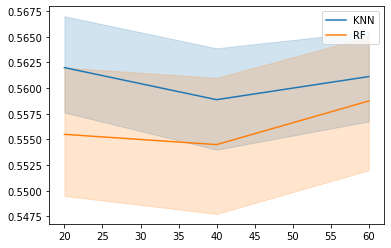

In [184]:
event=[]
for i in range(0,len(dim_knn)):
    event.append('KNN')
for j in range(0,len(dim_rf)):
    event.append('RF')
for k in range(0,len(dim_svm)):
    event.append('SVM')
    
dims=np.concatenate((dim_knn,dim_rf,dim_svm))
scores=np.concatenate((score_knn,score_rf,score_svm))

data={'Number of Noise Dimensions':dims,'Acc':scores,'Event':event}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data) 